In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
NO1 = gpd.read_file('NO1.geojson')
NO1

,ElSpotOmr,geometry
0,NO 1,"POLYGON ((10.67500 59.04529, 11.01052 59.00418..."


In [3]:
NO_list = [gpd.read_file('NO'+str(i)+'.geojson') for i in range(1,6)]
NO = pd.concat(NO_list)
NO=NO.rename(columns={"ElSpotOmr": "Region"})
NO['Region'] = NO['Region'].str.replace(" ","")
NO["CNTRY_NAME"]="Norway"
swapCols = ["CNTRY_NAME","Region","geometry"]
NO=NO.reindex(columns=swapCols)

NO.to_file("NOpriceRegions.geojson", driver="GeoJSON")
NO

,CNTRY_NAME,Region,geometry
0,Norway,NO1,"POLYGON ((10.67500 59.04529, 11.01052 59.00418..."
0,Norway,NO2,"POLYGON ((7.86292 60.22268, 7.74904 60.24487, ..."
0,Norway,NO3,"POLYGON ((14.07063 64.10796, 14.09497 64.13251..."
0,Norway,NO4,"POLYGON ((31.06432 70.28916, 31.16859 70.38684..."
0,Norway,NO5,"POLYGON ((7.51391 61.72939, 7.51395 61.73025, ..."


C:\ProgramData\Anaconda3\envs\geojsons\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


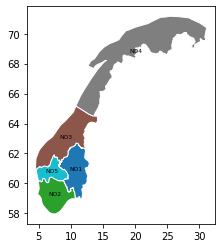

In [6]:
ax = NO.plot(column='Region', edgecolor='white')
NO.apply(lambda x: ax.annotate(s=x.Region, xy=x.geometry.centroid.coords[0], ha='center', size=6),axis=1);
plt.savefig('PriceRegions', dpi=1200)

In [ ]:
NO_km=NO.to_crs({'init': 'epsg:32633'})
NO_km["area_km^2"] = NO_km['geometry'].area/ 10**6
NO_total_area=385207
sum_of_priceareas=sum(NO_km["area_km^2"])
Area_difference=NO_total_area-sum_of_priceareas
print("Area difference =",Area_difference,"\nRelative error:","{0:.0%}".format(abs(Area_difference)/NO_total_area))
NO_km

In [ ]:
#Counties = gpd.read_file('fylker_komprimert.json')

In [ ]:
#Counties.plot(color='red', edgecolor='white')

In [ ]:
#fig, ax =plt.subplots()
#NO.plot(ax=ax, column='ElSpotOmr')
#Counties.plot(ax=ax, color='none', edgecolor='red')

In [ ]:
NorthenEurope = gpd.read_file('custom.geo.json')
NorthenEurope['centroid']=NorthenEurope.centroid
NorthenEurope['geometry']

In [ ]:
fig, ax = plt.subplots()
ax.axis=((-20,20,30,70))
NorthenEurope.plot(ax=ax, color='red')
NorthenEurope['centroid'].plot(ax=ax, color='black', size=5)
